<a href="https://colab.research.google.com/github/ralsouza/python_fundamentos/blob/master/src/05_desafio/05_missao05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Missão: Analisar o Comportamento de Compra de Consumidores.**
### Nível de Dificuldade: Alto

Você recebeu a tarefa de analisar os dados de compras de um web site! Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Seu trabalho é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Mas nesta missão você vai analisar o comportamento de compra dos consumidores usando o pacote Pandas da linguagem Python e seu relatório final deve incluir cada um dos seguintes itens:


**Contagem de Consumidores**
* Número total de consumidores

**Análise Geral de Compras**
* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total (Valor Total)

**Informações Demográficas Por Gênero**
* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

**Análise de Compras Por Gênero**
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária

**Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):**
* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares

**Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):**
* ID do item
* Nome do item
* Número de compras
* Preço Médio do item
* Valor Total de Compra
* Itens mais lucrativos

**Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):**
* ID do item
* Nome do item
* Número de compras
* Preço Médio do item
* Valor Total de Compra

**Como considerações finais:**
* Seu script deve funcionar para o conjunto de dados fornecido.
* Você deve usar a Biblioteca Pandas e o Jupyter Notebook.



In [1]:
# Imports
import pandas as pd
import numpy as np

# Load file from Drive
from google.colab import drive
drive.mount('/content/drive')

# Load file to Dataframe
load_file = "/content/drive/My Drive/dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **1. Análise Exploratória**

### **1.1 Checagem das primeiras linhas**

In [0]:
# Nota-se que os logins se repetem.
purchase_file.sort_values('Login')

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
144,Adairialis76,20,Masculino,44,Bonecarvin Battle Axe,2.46
308,Aduephos78,37,Masculino,79,"Alpha, Oath of Zeal",2.88
377,Aduephos78,37,Masculino,174,Primitive Blade,2.46
431,Aduephos78,37,Masculino,92,Final Critic,1.36
224,Aeduera68,26,Masculino,106,Crying Steel Sickle,2.29
...,...,...,...,...,...,...
363,Yathecal72,32,Masculino,16,Restored Bauble,3.11
580,Yathecal82,23,Masculino,178,"Oathbreaker, Last Hope of the Breaking Storm",2.41
437,Zhisrisu83,17,Masculino,82,Nirvana,1.11
376,Zhisrisu83,17,Masculino,33,Curved Axe,1.35


### **1.2 Checagem dos tipos dos dados**

In [0]:
purchase_file.dtypes

Login            object
Idade             int64
Sexo             object
Item ID           int64
Nome do Item     object
Valor           float64
dtype: object

### **1.3 Checagem de valores nulos**

In [0]:
purchase_file.isnull().sum().sort_values(ascending = False)

Valor           0
Nome do Item    0
Item ID         0
Sexo            0
Idade           0
Login           0
dtype: int64

### **1.4 Checagem de valores zero**

In [0]:
(purchase_file == 0).sum()

Login           0
Idade           0
Sexo            0
Item ID         1
Nome do Item    0
Valor           0
dtype: int64

### **1.5 Distribuição de idades**
O público mais representativo desta amostra encontra-se entre 19 há 26 anos de idade.

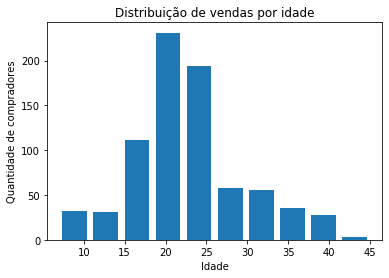

In [0]:
plt.hist(purchase_file['Idade'], histtype='bar', rwidth=0.8)

plt.title('Distribuição de vendas por idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de compradores')

plt.show()

### **1.6 Distribuição dos valores**
A maioria das vendas são dos produtos de `R$ 2,30`, `R$ 3,40` e `R$ 4,20`.

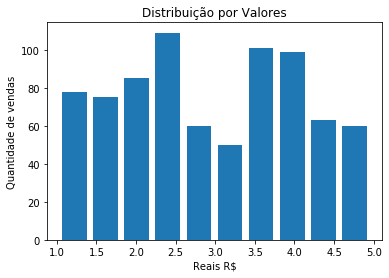

In [0]:
plt.hist(purchase_file['Valor'], histtype='bar', rwidth=0.8)

plt.title('Distribuição por Valores')
plt.xlabel('Reais R$')
plt.ylabel('Quantidade de vendas')

plt.show()

## **2. Informações Sobre os Consumidores**
* Número total de consumidores

In [0]:
# Contar a quantidade de logins, removendo as linhas com dados duplicados.

total_consumidores = purchase_file['Login'].drop_duplicates().count()
print('O total de consumidores na amostra são: {}'.format(total_consumidores))

O total de consumidores na amostra são: 573


## **3. Análise Geral de Compras**
* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total (Valor Total)

In [0]:
# Número de itens exclusivos
itens_exclusivos = purchase_file['Item ID'].drop_duplicates().count()

preco_medio = np.average(purchase_file['Valor'])

total_compras = purchase_file['Nome do Item'].count()

valor_total = np.sum(purchase_file['Valor'])

analise_geral = pd.DataFrame({
    'Itens Exclusivos':[itens_exclusivos],
    'Preço Médio (R$)':[np.round(preco_medio, decimals=2)],
    'Qtd. Compras':[total_compras],
    'Valor Total (R$)':[valor_total]
})

analise_geral

,Itens Exclusivos,Preço Médio (R$),Qtd. Compras,Valor Total (R$)
0,183,2.93,780,2286.33


## **4. Análise Demográfica por Genêro**
* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

In [0]:
# Selecionar os dados únicos do compradores para deduplicação
info_compradores = purchase_file.loc[:,['Login','Sexo','Idade']]

# Deduplicar os dados
info_compradores = info_compradores.drop_duplicates()

In [0]:
# Quantidade de compradores por genêro
qtd_compradores = info_compradores['Sexo'].value_counts()

# Percentual de compradores por genêro
perc_compradores = round(info_compradores['Sexo'].value_counts(normalize=True) * 100, 2)

# Armazenar dados no Dataframe
analise_demografica = pd.DataFrame(
    {'Percentual':perc_compradores,
     'Qtd. Compradores':qtd_compradores
     }
)

In [0]:
# Impressão da tabela
analise_demografica

,Percentual,Qtd. Compradores
Masculino,81.15,465
Feminino,17.45,100
Outro / Não Divulgado,1.40,8


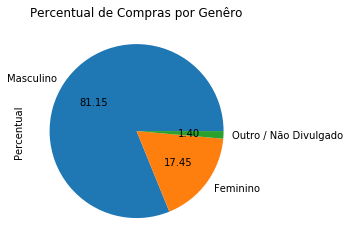

In [0]:
plot = analise_demografica['Percentual'].plot(kind='pie',
                                              title='Percentual de Compras por Genêro',
                                              autopct='%.2f')

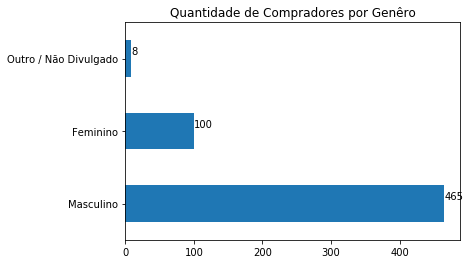

In [0]:
plot = analise_demografica['Qtd. Compradores'].plot(kind='barh',
                                                    title='Quantidade de Compradores por Genêro')
# Add labels
for i in plot.patches:
    plot.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10)

## **5. Análise de Compras Por Gênero**

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária


In [0]:
# Número de compras por genêro
nro_compras_gen = purchase_file['Sexo'].value_counts()

# Preço médio de compra por genêro
media_compras_gen = round(purchase_file.groupby('Sexo')['Valor'].mean(), 2)

# Total de compras por genêro
total_compras_gen = purchase_file.groupby('Sexo')['Valor'].sum()

analise_compras = pd.DataFrame(
    {'Qtd. de Compras':nro_compras_gen,
     'Preço Médio (R$)':media_compras_gen,
     'Total Compras (R$)':total_compras_gen}
)

In [0]:
# Impressão da tabela
analise_compras

,Qtd. de Compras,Preço Médio (R$),Total Compras (R$)
Feminino,136,2.82,382.91
Masculino,633,2.95,1867.68
Outro / Não Divulgado,11,3.25,35.74


In [0]:
# Usar dataframe deduplicado

info_compradores

,Login,Sexo,Idade
0,Aelalis34,Masculino,38
1,Eolo46,Masculino,21
2,Assastnya25,Masculino,34
3,Pheusrical25,Masculino,21
4,Aela59,Masculino,23
...,...,...,...
771,Lassista97,Masculino,24
772,Sidap51,Masculino,15
773,Chamadarsda63,Masculino,21
778,Quelaton80,Masculino,20


In [0]:
# Compras por faixa etária
age_bins =  [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 999]
seg_idade = ['Menor de 10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', 'Maior de 39']

info_compradores['Intervalo Idades'] = pd.cut(info_compradores['Idade'], age_bins, labels=seg_idade)

Text(0.5, 0, 'Faixas de Idades')

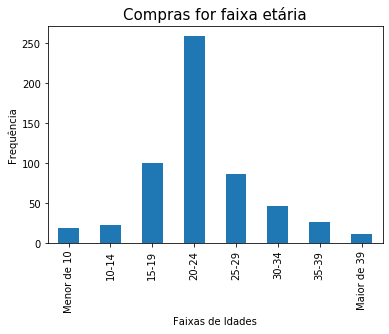

In [0]:
df_hist_compras = pd.DataFrame(info_compradores['Intervalo Idades'].value_counts(), index=seg_idade)

hist = df_hist_compras.plot(kind='bar', legend=False)

hist.set_title('Compras for faixa etária', fontsize=15)
hist.set_ylabel('Frequência')
hist.set_xlabel('Faixas de Idades')

## **6. Consumidores Mais Populares (Top 5)**
Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares

In [0]:
consumidores_populares = purchase_file[['Login','Nome do Item','Valor']]

In [0]:
consumidores_populares.head(5)

,Login,Nome do Item,Valor
0,Aelalis34,Bone Crushing Silver Skewer,3.37
1,Eolo46,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,Primitive Blade,2.46
3,Pheusrical25,Final Critic,1.36
4,Aela59,Stormfury Mace,1.27


In [0]:
top_por_compras = consumidores_populares.groupby(['Login']).count()['Nome do Item']
top_por_valor_medio = round(consumidores_populares.groupby('Login').mean()['Valor'], 2)
top_por_valor_total = consumidores_populares.groupby('Login').sum()['Valor']

top_consumidores = pd.DataFrame({'Número de Compras': top_por_compras,
                                 'Preço Médio(R$)': top_por_valor_medio,
                                 'Valor Total(R$)': top_por_valor_total}) \
                                 .sort_values(by=['Valor Total(R$)'], ascending=False) \
                                 .head(5)

top_itens = consumidores_populares['Nome do Item'].value_counts().head(5)

In [0]:
top_consumidores

,Número de Compras,Preço Médio(R$),Valor Total(R$)
Login,,,
Undirrala66,5,3.41,17.06
Saedue76,4,3.39,13.56
Mindimnya67,4,3.18,12.74
Haellysu29,3,4.24,12.73
Eoda93,3,3.86,11.58


In [0]:
itens_populares = pd.DataFrame(consumidores_populares['Nome do Item'].value_counts().head(5))
itens_populares

,Nome do Item
Final Critic,14
"Betrayal, Whisper of Grieving Widows",11
Arcane Gem,11
Stormcaller,10
Woeful Adamantite Claymore,9


## **7. Itens Mais Populares**
Identifique os 5 itens mais populares **por contagem de compras** e, em seguida, liste (em uma tabela):
* ID do item
* Nome do item
* Número de compras
* Preço Médio do item
* Valor Total de Compra
* Itens mais lucrativos

In [0]:
itens_populares = purchase_file[['Item ID','Nome do Item','Valor']]

In [61]:
num_compras = itens_populares.groupby('Nome do Item').count()['Item ID']
media_preco = round(itens_populares.groupby('Nome do Item').mean()['Valor'], 2)
total_preco = itens_populares.groupby('Nome do Item').sum()['Valor']

df_itens_populares = pd.DataFrame({
    'Numero de Compras': num_compras,
    'Preço Médio do Item': media_preco,
    'Valor Total da Compra': total_preco}) \
    .sort_values(by=['Numero de Compras'], ascending=False) \
    .head(5)

df_itens_populares


,Numero de Compras,Preço Médio do Item,Valor Total da Compra
Nome do Item,,,
Final Critic,14,2.76,38.60
Arcane Gem,11,2.23,24.53
"Betrayal, Whisper of Grieving Widows",11,2.35,25.85
Stormcaller,10,3.46,34.65
Woeful Adamantite Claymore,9,1.24,11.16


## **8. Itens Mais Lucrativos**
Identifique os 5 itens mais lucrativos pelo **valor total de compra** e, em seguida, liste (em uma tabela):
* ID do item
* Nome do item
* Número de compras
* Preço Médio do item
* Valor Total de Compra

In [0]:
# Implemente aqui sua solução